### Concrete compression Strength analysis

Given a dataset on cement compression strength, let us try to find what factors we should focus on

#### Modules

In [160]:
import numpy as np #numpy needed for 
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #need matplot and seaborn for visualisation
import seaborn as sns


#### Some User - defined methods to help us

In [161]:
#Reading Dataset

def get_data(name):
    import os
    if name not in os.listdir():
        print("Error file not in directory")
    
    ext = name.split('.')
    
    if 'xls' in ext[1]:
        df = pd.read_excel(name)
        return df
    if 'txt' in ext[1]:
        df = pd.read_csv(name, sep = ' ',header = None)
        return df
    if 'csv' in ext[1]:
        df = pd.read_csv(name)
        return df
    

In [162]:
#Boxplot function, which can help us understand distributions

def boxplot_of_attr(df,n):
    column = [i for i in df.columns]
    m = len(column) // n
    #print(m,n)
    plt.figure(figsize=(n*5,(m+1)*5))
    for i in enumerate(column):
        plt.subplot(m+1,n,i[0]+1)
        sns.boxplot(df[i[1]])
        plt.title("{} distribution".format(i[1]))

In [174]:
#Function that can help us find number of outliers in the dataset

def get_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    result_df = pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
    #print(result_df[0].index)
    result_df = pd.DataFrame({'Attributes': result_df[0].index, 'Number of outliers': result_df[0].values})
    return result_df

In [164]:
#Function to visualise the attributes with the target attribute


def pairplot_Data(df,n):
    column = [i for i in df.columns]
    column = column[:-1]
    m = len(column) // n
    #print(m,n)
    plt.figure(figsize=(n*5,(m+1)*5))
    for i in enumerate(column):
        plt.subplot(m+1,n,i[0]+1)
        sns.regplot(x = df[i[1]], y = df['strength'],data = df)
        #plt.title("{} distribution".format(i[1]))

### Read initial dataset

In [165]:
df = get_data('Concrete_Data.xls') #reading dataset from a local excel file

##### The Dataset

In [166]:
df.shape #gives us the number of rows and columns of a dataset

(1030, 9)

There are about 1030 rows of data with 9 different attributes, final attributes being the target - Compression strength

In [167]:
df.head() #gives us a peak of the dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Renaming columns to make them easier to understand

In [168]:
#the new columns names
df.columns = ['cement','blast furnace','Fly ash','water','superplasticizer','coarse agg','fine agg','age','strength']

In [169]:
df.head()

,cement,blast furnace,Fly ash,water,superplasticizer,coarse agg,fine agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


We use the pandas describe() to get some initial statistical viewpoints

In [170]:
df.describe()

,cement,blast furnace,Fly ash,water,superplasticizer,coarse agg,fine agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Checking if any null values, if any found - we can remove them/fill them with mean values and proceed to the next step

In [171]:
df.isna().sum() #isna checks for null values, and sum gives the count of those values if they are present

cement              0
blast furnace       0
Fly ash             0
water               0
superplasticizer    0
coarse agg          0
fine agg            0
age                 0
strength            0
dtype: int64

No null values found, so the data is clean enough to proceed to some visualisations

### Visualisation

Finding distributions of data with help of visualization

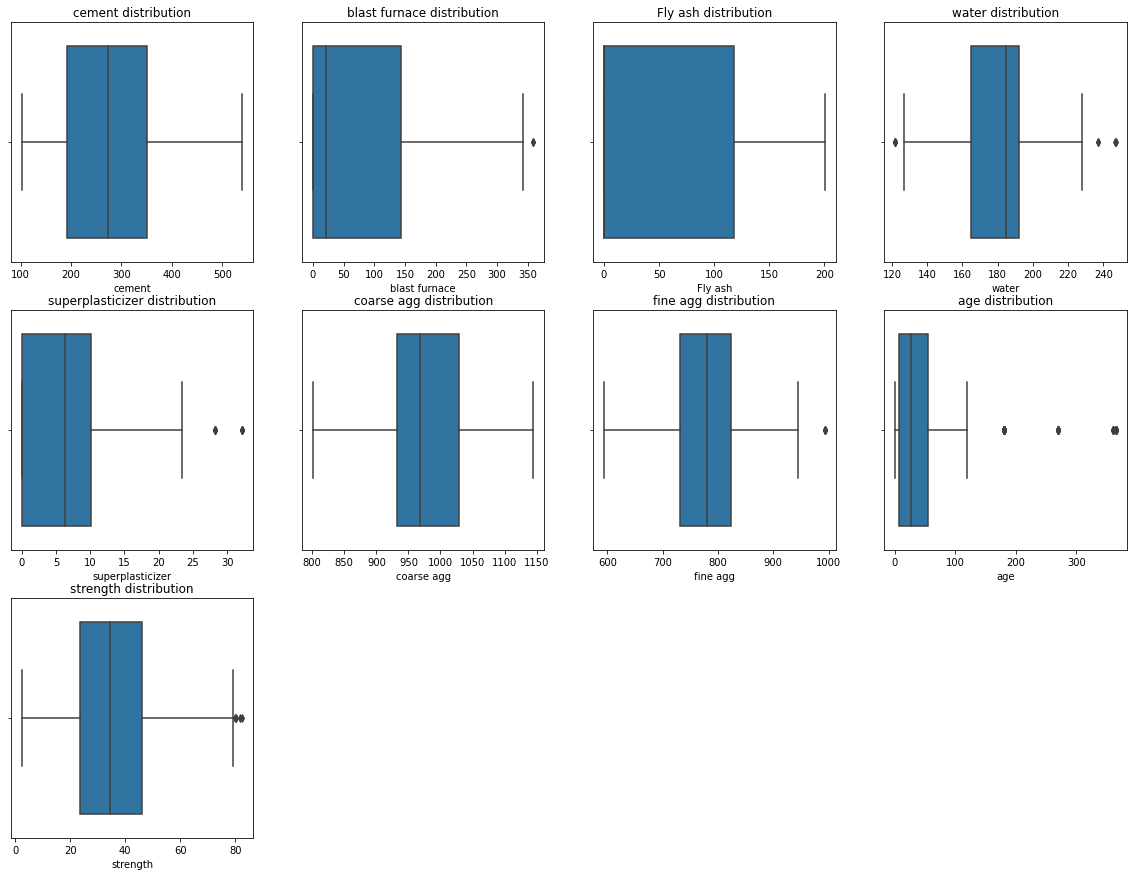

In [172]:
boxplot_of_attr(df,4)

No of outliers present in the dataset

In [175]:
my_df = get_outliers(df)
my_df

,Attributes,Number of outliers
0,cement,0
1,blast furnace,2
2,Fly ash,0
3,water,9
4,superplasticizer,10
5,coarse agg,0
6,fine agg,5
7,age,59
8,strength,4


Finding Correlation between attributes, basically how much two attributes are related

In [54]:
df.corr() #default is pearson correlation

,cement,blast furnace,Fly ash,water,superplasticizer,coarse agg,fine agg,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blast furnace,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse agg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine agg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


We see that cement, superplasticizer and age have the highest correlation with respect to strength

Superplasticizer is basically added to reduce the required water content, and add strength. Which is why its correlated with strength and negative related to water


We can also observe that for house constructions, the concrete is hydrated frequently for days to increase its strength. This is one of the reasons age is correlated with strength

### More plots

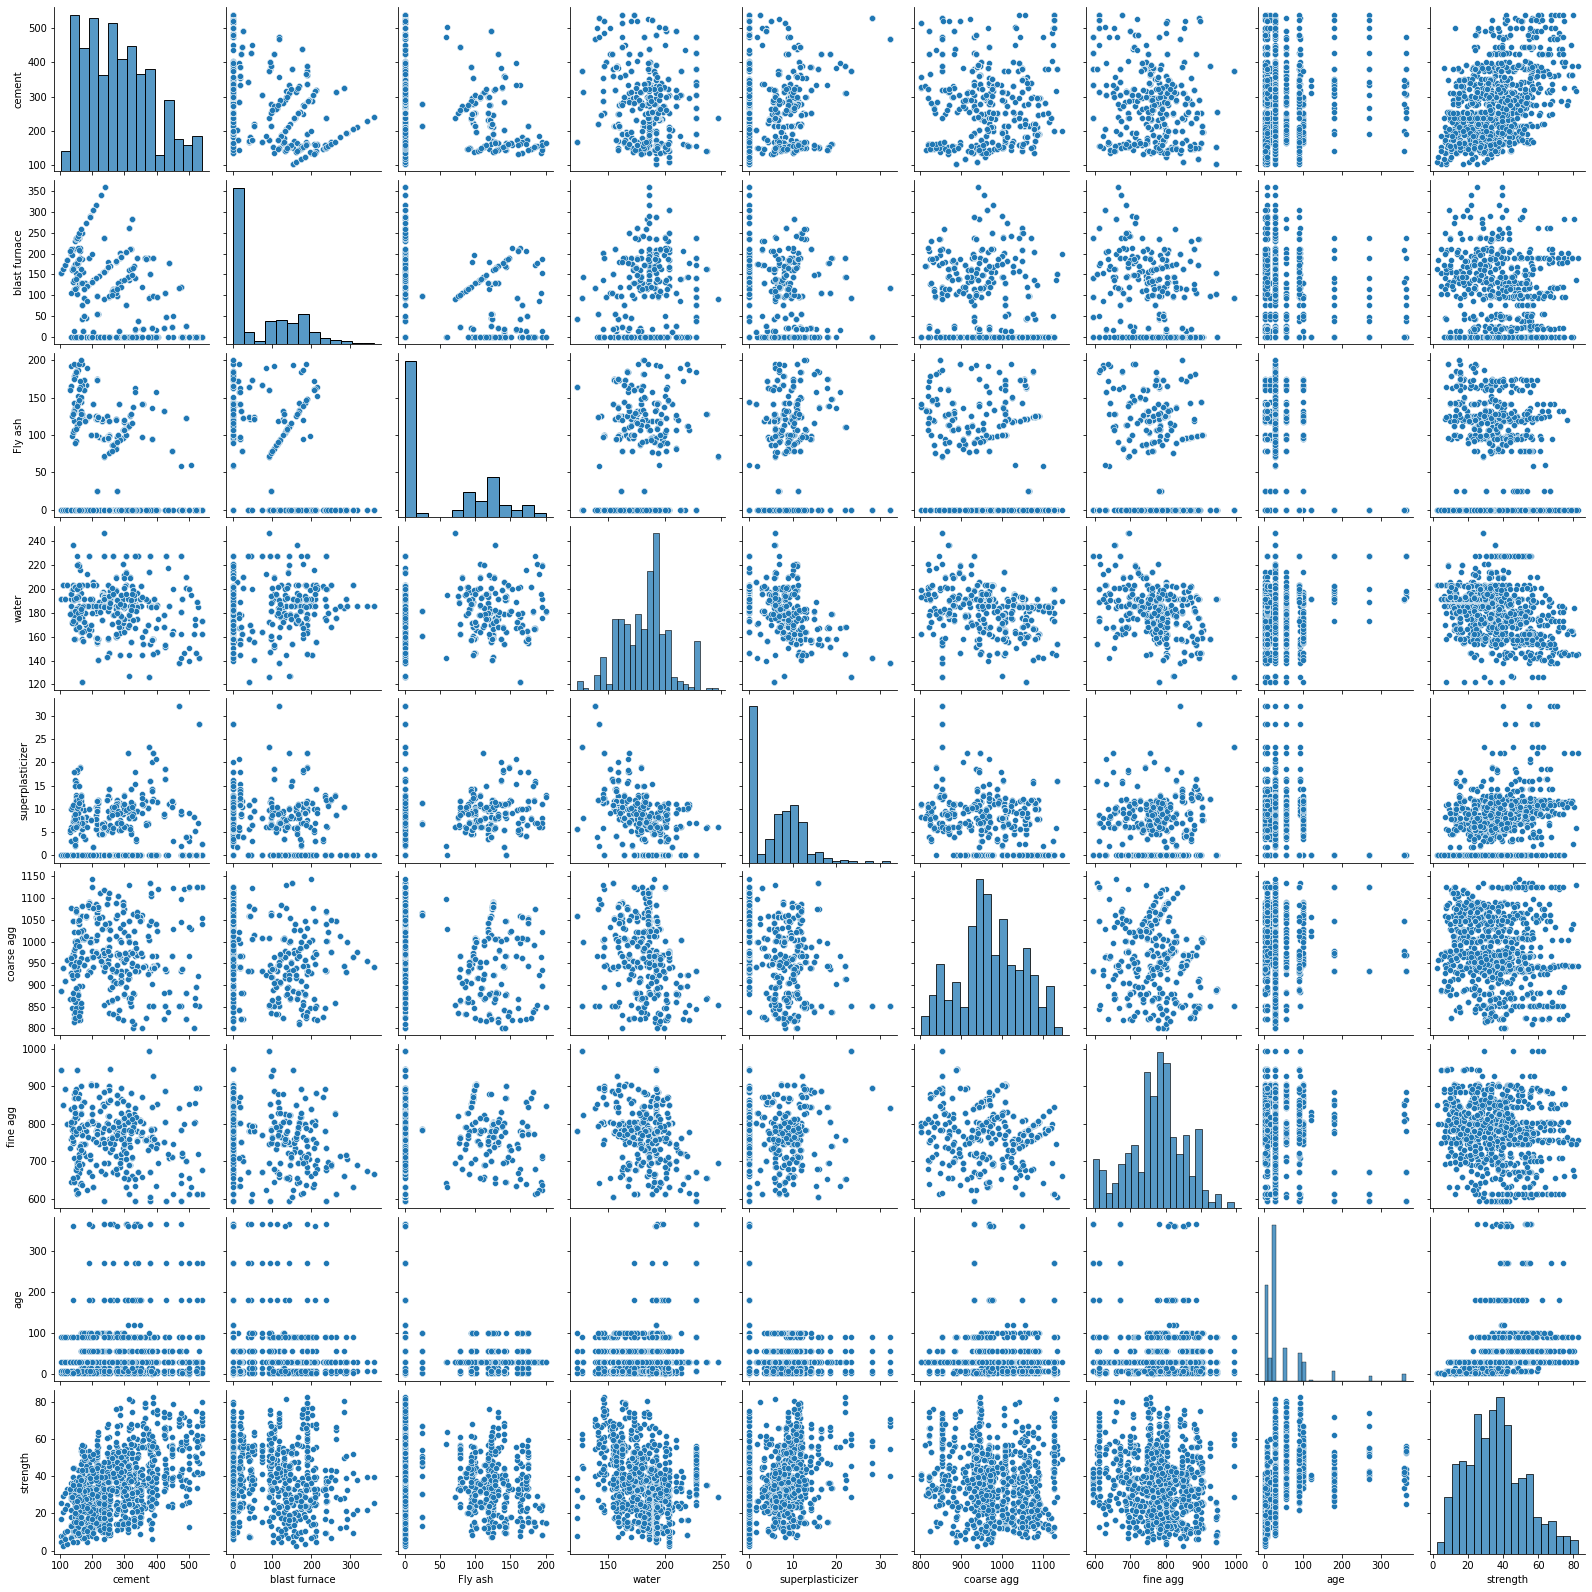

In [76]:
sns.pairplot(df)

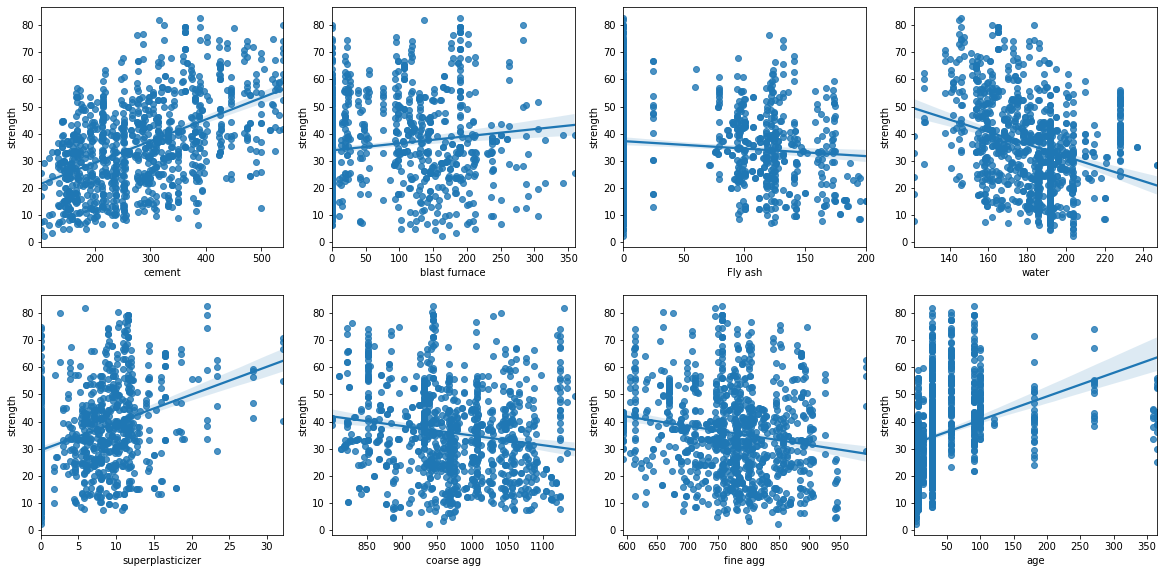

In [176]:
# Plot graphs between the attributes and compressive strength to visualise how distributions go
    
pairplot_DataFrame(df,4)

#### M L algorithms from scratch

### 1. Linear Regression

Defining Linear Regression Class

In [178]:
#Defining the class
class MyLinearRegression:
    def __init__(self, x , y):
        self.data = x
        self.label = y
        self.m = 0
        self.b = 0
        self.n = len(x)
         
    def fit(self , epochs , lr):
         
        #Implementing Gradient Descent
        for i in range(epochs):
            y_pred = self.m * self.data + self.b
             
            #Calculating derivatives w.r.t Parameters
            D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
            D_b = (-1/self.n)*sum(self.label-y_pred)
             
            #Updating Parameters
            self.m = self.m - lr * D_m
            self.c = self.b - lr * D_c
             
    def predict(self , inp):
        y_pred = self.m * inp + self.b 
        return y_pred

### 2. K - Nearest Neighbours

In [ ]:
class MyKNN:
    def __init__(self,x,y):
        
        
        
    def euclideanDistance(data1,data2,length):
        dist = 0
        for x in range(length):
            dist += np.square(data1[x] - data2[x])
        return np.sqrt(dist)
    
    
    def knn(trainingSet, testInstancen k):
        distances = {}
        sort = {}
        
        length = testInstance.shape[1]
        for x in range(len(trainingSet)):
            dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
            distances[x] = dist
            sorted_d = sorted(distances.items(), key = operator.itemgetter(1))
        neighbors = []
            
        for x in range(k):
            neighbors.append(sorted_d[x][0])
        classVotes = {}
        for x in range(len(neighbors)):
            response = trainingSet.iloc[neighbors[x]][-1]
            if response in classVotes:
                classVotes[response] += 1
            else:
                classVotes[response] = 1
                
        sortedVotes = serted(classVotes.items(), key = operator.itemgetter(1))
        return sortedVotes[0][0]

In [ ]:
utility class - write to text
plot class
analyze class
reporting class